# Task 1

Generate a pandas dataframe that contains data from the students, scores, enrolls, and courses tables.

In [1]:
import pandas as pd 
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='gwumysql.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='classuser',
                             port=3306,
                             db='EMSE6992',
                             password='emse6992pass',
                             cursorclass=pymysql.cursors.DictCursor)

In [34]:
cur = connection.cursor()

dataAll = cur.execute('''select * from( 
                                select * from (
                                    select fname,
                                            lname, 
                                            minit, 
                                            a.sid as student_id, 
                                            term as term_all, 
                                            lineno as line_no, 
                                            compname, 
                                            points 
                                            from students a 
                                            left join scores b on a.sid = b.sid) c 
                                left join enrolls on c.student_id = enrolls.sid and c.term_all = enrolls.term and c.line_no = enrolls.lineno) d 
                        left join courses on d.term_all = courses.term and d.line_no = courses.lineno;''')

df_1 = pd.DataFrame.from_dict(cur.fetchall())
df_1

,a,b,c,cno,compname,courses.lineno,courses.term,d,enroll_datetime,fname,line_no,lineno,lname,minit,points,sid,student_id,term,term_all
0,90.0,80.0,65.0,csc226,exam1,1031.0,f96,50.0,2017-12-05 02:07:48,Nandita,1031.0,1031.0,Rajshekhar,K,90.0,1111,1111,f96,f96
1,90.0,80.0,65.0,csc226,final,1031.0,f96,50.0,2017-12-05 02:07:48,Nandita,1031.0,1031.0,Rajshekhar,K,95.0,1111,1111,f96,f96
2,90.0,80.0,65.0,csc226,quizzes,1031.0,f96,50.0,2017-12-05 02:07:48,Nandita,1031.0,1031.0,Rajshekhar,K,78.0,1111,1111,f96,f96
3,90.0,80.0,65.0,csc226,final,1032.0,f96,50.0,2017-12-05 02:10:32,Nandita,1032.0,1032.0,Rajshekhar,K,99.0,1111,1111,f96,f96
4,90.0,80.0,65.0,csc226,midterm,1032.0,f96,50.0,2017-12-05 02:10:32,Nandita,1032.0,1032.0,Rajshekhar,K,95.0,1111,1111,f96,f96
5,90.0,80.0,65.0,csc226,programs,1032.0,f96,50.0,2017-12-05 02:10:32,Nandita,1032.0,1032.0,Rajshekhar,K,400.0,1111,1111,f96,f96
6,50.0,50.0,50.0,EMSE699,final,1099.0,S18,50.0,2018-02-08 23:54:40,Jane,1099.0,1099.0,Liu,M,98.0,1919,1919,s18,s18
7,50.0,50.0,50.0,EMSE699,midterm,1099.0,S18,50.0,2018-02-08 23:54:40,Jane,1099.0,1099.0,Liu,M,90.0,1919,1919,s18,s18
8,90.0,80.0,65.0,csc226,exam1,1031.0,f96,50.0,2017-12-13 01:07:48,Sydney,1031.0,1031.0,Corn,A,70.0,2222,2222,f96,f96
9,90.0,80.0,65.0,csc226,final,1031.0,f96,50.0,2017-12-13 01:07:48,Sydney,1031.0,1031.0,Corn,A,82.0,2222,2222,f96,f96


# Task 1

Plot the distribution of scores in the EMSE6992.scores table.

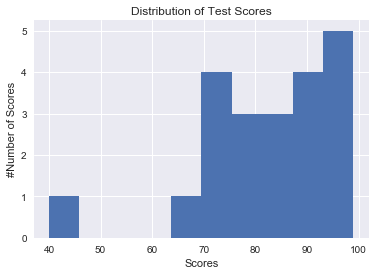

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

scores_script = cur.execute('select points from scores where compname != "programs"')
scores_scores = cur.fetchall()

plt.hist(pd.DataFrame.from_dict(scores_scores).iloc[:,0], bins = 10)
plt.xlabel("Scores")
plt.ylabel("#Number of Scores")
plt.title("Distribution of Test Scores")

# Task 2

Plot the distributions of the scores in the EMSE6992.scores table, grouped by the different exam types

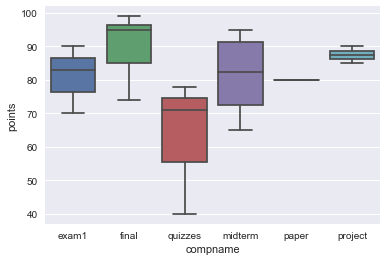

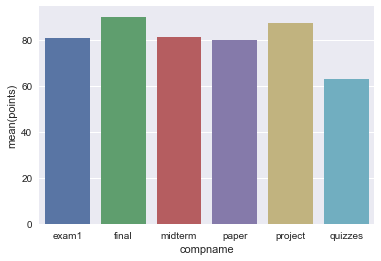

In [14]:
scoresByExamScript = cur.execute('select compname, points from scores where compname != "programs"')

pd.DataFrame.from_dict(cur.fetchall())
fig1,ax1 = plt.subplots()
sb.boxplot(x = scores_byExam['compname'], y = scores_byExam['points'])

#Or with explicit group by function from pandas
grouped_scoresDf = scores_byExam.groupby(by = 'compname', as_index= False).mean()
fig2, ax2 = plt.subplots()
sb.barplot(x = grouped_scoresDf["compname"], y= grouped_scoresDf['points'])


# Task 3

Determine the letter grade for each student for each class (ignoring the 'programs' compname)
NOTE: You can achieve this through pandas or SQL, regardless your juypter cell should print out the appropriate results

In [63]:
dfClean = df_1[["fname", 'minit', 'lname', 'cno', 'lineno', 'compname', 'points', 'term' ]]
dfClean["Letter Grade"] = None

for i in range(0,len(dfClean)):
    if dfClean.loc[i,"points"] > 100:
        dfClean.loc[i,"Letter Grade"] = None
    elif dfClean.loc[i,"points"] >= 90:
        dfClean.loc[i,"Letter Grade"] = "A"
    elif dfClean.loc[i,"points"] < 90 and dfClean.loc[i,"points"] >= 80:
        dfClean.loc[i,"Letter Grade"] = "B"
    elif dfClean.loc[i,"points"] < 80 and dfClean.loc[i,"points"] >= 65:
        dfClean.loc[i,"Letter Grade"] = "C"
    elif dfClean.loc[i,"points"] < 65:
        dfClean.loc[i,"Letter Grade"] = "D"

dfClean = dfClean.loc[dfClean["compname"]!= 'programs', :]
dfClean

/Users/davidrobison/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/davidrobison/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fname,minit,lname,cno,lineno,compname,points,term,Letter Grade
0,Nandita,K,Rajshekhar,csc226,1031.0,exam1,90.0,f96,A
1,Nandita,K,Rajshekhar,csc226,1031.0,final,95.0,f96,A
2,Nandita,K,Rajshekhar,csc226,1031.0,quizzes,78.0,f96,C
3,Nandita,K,Rajshekhar,csc226,1032.0,final,99.0,f96,A
4,Nandita,K,Rajshekhar,csc226,1032.0,midterm,95.0,f96,A
6,Jane,M,Liu,EMSE699,1099.0,final,98.0,s18,A
7,Jane,M,Liu,EMSE699,1099.0,midterm,90.0,s18,A
8,Sydney,A,Corn,csc226,1031.0,exam1,70.0,f96,C
9,Sydney,A,Corn,csc226,1031.0,final,82.0,f96,B
10,Sydney,A,Corn,csc226,1031.0,quizzes,40.0,f96,D


# Task 4

Add yourself to the students table, enroll yourself in at least one course, and provide some scores for your course(s)

In [72]:
cur.execute('insert into students (sid, fname, lname, minit, birthday) values (8737, "David", "Robison", "J", "02/05")')

cur.execute('insert into courses (term, lineno, cno, a,b,c,d) values ("sp18", "9999", "emse699", "90","80","65","50");')

cur.execute('insert into enrolls (sid, term, lineno, enroll_datetime) values ("8737", "sp18", "9999", "2018-02-05 12:00:00")')

#Insert into components,then insert into scores table
cur.execute('insert into components (term, lineno, compname, maxpoints, weight) values ("sp18", "9999", "exam1", 100, 30)')
cur.execute('insert into scores (compname, lineno, points, sid, term) values ("exam1", "9999", "90", "8737", "sp18")')